In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

/tmp/ipykernel_1968620/893508207.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [3]:
# Collect some stats on the dataset
print("Total number of matches: ", len(df))
print("Number of leagues: ", df['league_name'].nunique())
print("Number of different home teams: ", df['home_team_name'].nunique())
print("Number of different away teams: ", df['away_team_name'].nunique())

# Find oldest and newest match record
df['match_date'] = pd.to_datetime(df['match_date'])
print("Oldest match recorded: ", df['match_date'].min())
print("Newest match recorded: ", df['match_date'].max())

Total number of matches:  110938
Number of leagues:  727
Number of different home teams:  9813
Number of different away teams:  9892
Oldest match recorded:  2019-12-01 00:45:00
Newest match recorded:  2021-05-01 00:00:00


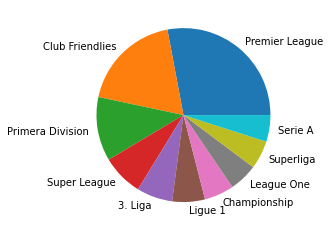

In [4]:
# Checking most common leagues
most_common_leagues = df['league_name'].value_counts()[:10]
# Create pie plot
vals = most_common_leagues.values
labels = most_common_leagues.keys().tolist()

plt.pie(vals, labels = labels)
plt.show()
print()


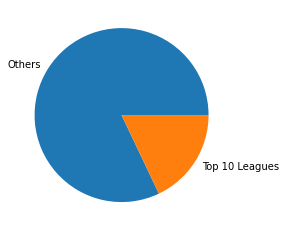

In [5]:
others = len(df) - sum(most_common_leagues)
# Create pie plot
vals = [others,sum(most_common_leagues)]
labels = ["Others", "Top 10 Leagues"]

plt.pie(vals, labels = labels)
plt.show() 

<AxesSubplot:>

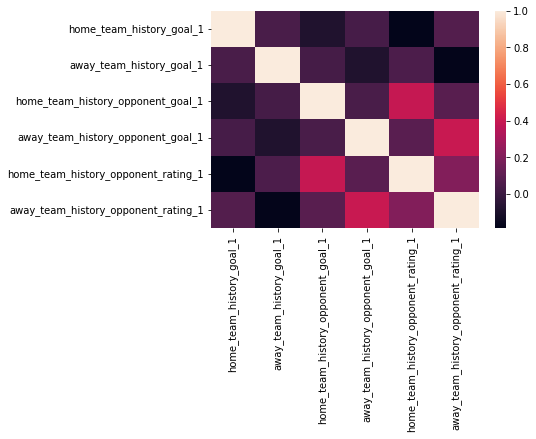

In [6]:
# Correlation Heatmap creation
columns = ["home_team_history_goal_1", "away_team_history_goal_1",
           "home_team_history_opponent_goal_1", "away_team_history_opponent_goal_1", 
           "home_team_history_opponent_rating_1", "away_team_history_opponent_rating_1"]
corr_df = df[columns]
correlation = corr_df.corr()
# Plot the heatmap 
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)